In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13

#### Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330-2023s/blob/master/docs/calendar.html).

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={points:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023s/blob/main/docs/homework_instructions.md).
- Upload the .ipynb file to Gradescope.
- **If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb.** 
- Make sure that your plots/output are rendered properly in Gradescope.

**Answer to 13: 4. Final test score and metrics**

In [2]:
import pandas as pd
final = {
    'Final test score': [0.8163],
    'Test Precision': [0.6270],
    'Test Recall': [0.3737],
    'Test F1 Score': [0.4683],
    'Test ROC-AUC': [0.6561],
}
pd.DataFrame(final).T

,0
Final test score,0.8163
Test Precision,0.6270
Test Recall,0.3737
Test F1 Score,0.4683
Test ROC-AUC,0.6561


The final test score is 0.8163, precision is 0.6270, recall is 0.3737, F1 score is 0.4683, ROC-AUC score is 0.6561.

## Imports

In [3]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
import seaborn as sns

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

The dataset provides us the information of credit card clients, including personal information such as sex, education, marriage, and age, also including information of credit card payment history, amount of bill statement, and credit of the client. 
Meaning of confusion feature names: 
LIMIT_BAL is limited balance, the amount of given credit in NT dollars; 
PAY_0 - PAY_6 are repayment status in from April to September in 2005 (-2=No consumption, -1=pay duly, 1=payment delay for 1 month, 2=payment delay for 2 months...). 
BILL_AMT1 - BILLAMT6 represent the amount of bill statement from April to September in 2005(NT dollar);
PAY_AMT1-PAY_AMT6 represent the amount of previous payment from April to September in 2005(NT dollar);

In order to predict whether a person will default their credit card bills, we can use supervised machine learning models combined with those features. There are too many features, so first we may want to delete irrelevant features or determine which features are stronger predictors of default payment.

In [4]:
credit_card_df = pd.read_csv('data/UCI_Credit_Card.csv')
credit_card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [5]:
train_df, test_df = train_test_split(credit_card_df, test_size = 0.3, random_state = 123)

<!-- END QUESTION -->

<br><br>

In [6]:
train_df['EDUCATION'].value_counts()

2    9815
1    7433
3    3416
5     210
4      81
6      35
0      10
Name: EDUCATION, dtype: int64

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Type your answer here, replacing this text._

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                  

All features are numeric features, and no features with missing values.

In [8]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


The range of all features are very different, we may apply scaling transformers on the dataset.

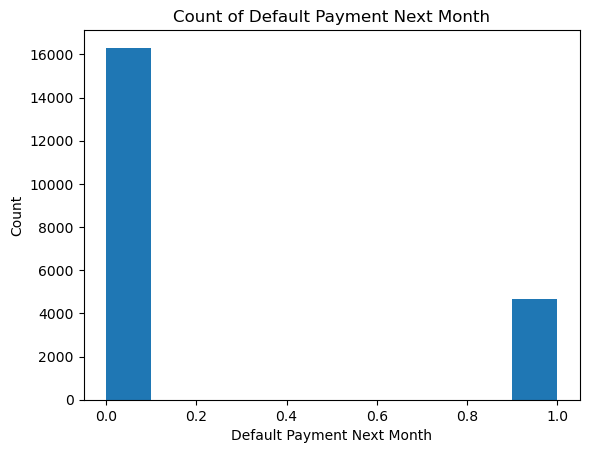

In [9]:
# visualize target with histogram
plt.hist(train_df['default.payment.next.month'], bins = 10)
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.title('Count of Default Payment Next Month')
plt.show()

The target default.payment.next.month has two classes, 0 and 1, and we can see there is a class imbalance in the dataset.

In [10]:
train_df['default.payment.next.month'].value_counts(normalize = True)

0    0.776762
1    0.223238
Name: default.payment.next.month, dtype: float64

Class 0 occupied 77.7% of the total number of targets, class 1 occupied 22.3% of the total number of targets.

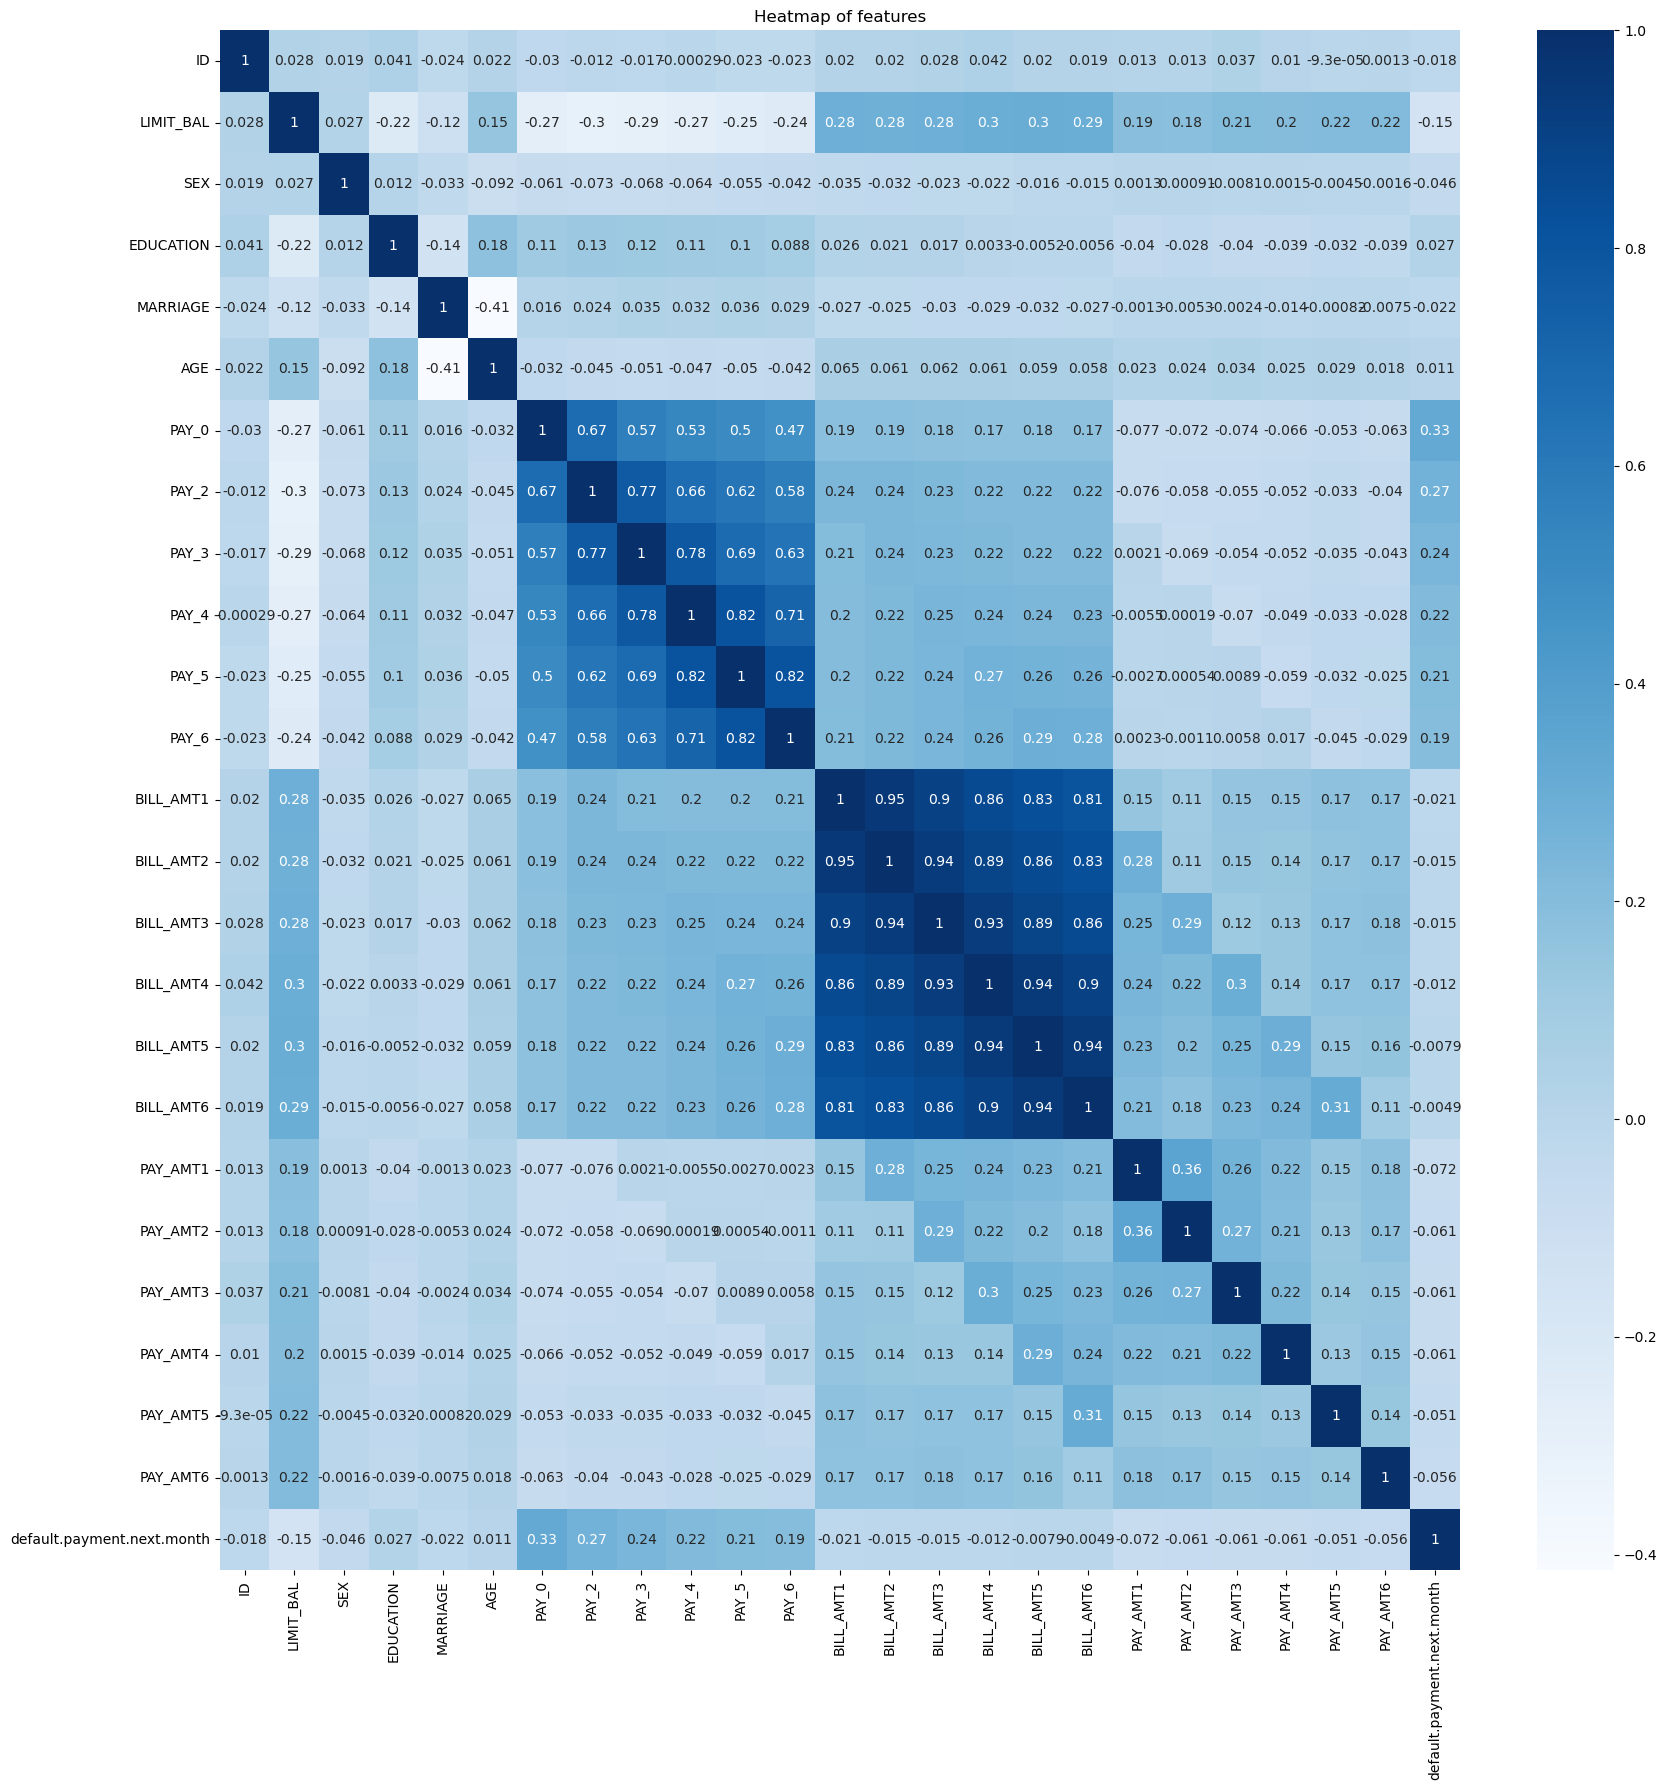

In [11]:
cor = train_df.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(cor, annot = True, cmap = plt.cm.Blues)
plt.title('Heatmap of features')
plt.show()

From the heatmap, we can see that the features pay_0, pay_2, pay_3, pay_4, pay_5, pay_6 are most correlated to the target, default.payment.next.month, pay_0 is the highest.

Overall, all features are numeric data and with no missing values, but all features have significantly different scales. The target data is class imbalanced, 77.7% clients don't default payment, only 22.3% clients default payment, which makes sense as majority people don't default credit card payment in real life. The repayment status in 6 months are the most correlated to the target. 

By reading documentations of the dataset, SEX is a binary feature, MARRIAGE, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6 are categorical features but encoded in integer, EDUCATION can be considered as an ordinal feature.

In the context, spotting the examples of default payment next month is more valuable. We have class imbalance in our dataset, the metric accuracy will not be reliable that much, therefore, I will pick metrics accuracy, precision, recall, f1 score, ROC-AUC score for assessment. Precision, recall, f1 score and ROC-AUC are more informative than accuracy when dealing with class imbalance.

In [12]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [13]:
train_df['LIMIT_BAL'].unique()

array([ 320000.,  440000.,  160000.,  120000.,   50000.,  290000.,
         30000.,  200000.,  220000.,  300000.,   80000.,  190000.,
        130000.,   10000.,  100000.,   90000.,   20000.,  500000.,
        170000.,  400000.,  180000.,   70000.,  310000.,  140000.,
        280000.,   60000.,  150000.,  480000.,  260000.,  210000.,
        330000.,  240000.,  230000.,  430000.,  360000.,  110000.,
        390000.,  470000.,  270000.,  490000.,  380000., 1000000.,
        450000.,   40000.,  340000.,  250000.,  410000.,  370000.,
        550000.,  460000.,  350000.,  420000.,  510000.,  680000.,
        710000.,  530000.,  600000.,  590000.,  650000.,  700000.,
        540000.,  660000.,  630000.,  640000.,  520000.,  560000.,
        760000.,  570000.,  610000.,  720000.,  670000.,  580000.,
        730000.,  780000.,  750000.,  620000.,  690000.,   16000.,
        800000.,  327680.])

In [14]:
train_df['SEX'].unique()

array([2, 1], dtype=int64)

In [15]:
train_df['EDUCATION'].unique()

array([1, 3, 2, 5, 4, 6, 0], dtype=int64)

In [16]:
train_df['MARRIAGE'].unique()

array([2, 1, 3, 0], dtype=int64)

In [17]:
train_df['AGE'].unique()

array([36, 30, 44, 54, 37, 24, 56, 26, 49, 33, 25, 35, 40, 31, 38, 39, 46,
       52, 27, 29, 51, 32, 50, 28, 23, 48, 69, 42, 47, 45, 57, 34, 22, 41,
       53, 55, 59, 62, 43, 61, 58, 60, 66, 65, 21, 64, 67, 70, 63, 68, 72,
       75, 79, 73, 74, 71], dtype=int64)

In [18]:
# skip PAY_2 to PAY_6 as they have the same scale
train_df['PAY_0'].unique()

array([ 0, -1, -2,  1,  2,  3,  5,  8,  7,  4,  6], dtype=int64)

As we analyzed in part 3 and print results of value_counts() above, we can identify feature types and appropriate transformations applying on each feature type:
- ID: numeric data type, drop it as it is not a useful feature for prediction
- LIMIT_BAL: numeric feature, very large values so apply scaling transformations
- SEX: categorical binary feature represented by numeric numbers, no need to apply transformation
- EDUCATION: ordinal categorical feature represented by numeric numbers, no need to apply transformation
- MARRIAGE: categorical feature represented by numeric numbers, no need to apply transformation
- AGE: numeric feature, reasonable magnitudes but apply scaling transformation for all features have the similar scales
- PAY_0-PAY_6: categorical feature represented by numeric numbers, no need to apply transformation
- BILL_AMT1-BILL_AMT6, PAY_AMT1-PAY_AMT6: numeric features, all large values, apply scaling transformation

In [19]:
X_train, y_train = train_df.drop(columns = ['default.payment.next.month']), train_df['default.payment.next.month']
X_test, y_test = test_df.drop(columns = ['default.payment.next.month']), test_df['default.payment.next.month']

In [20]:
numeric_feats = [
    'LIMIT_BAL', 
    'AGE', 
    'BILL_AMT1', 
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6',
]

passthrough_feats = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
]

drop_feats = ['ID']

In [21]:
# 0, 6, 5, 4 are unknow, 3, 2, 1 ordered by ascending
education_levels = ['0', '6', '5', '4', '3', '2', '1']

In [22]:
ct = make_column_transformer(
    (StandardScaler(), numeric_feats),
    ('passthrough', passthrough_feats),
    ('drop', drop_feats),
)

In [23]:
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

In [24]:
column_names = (
    numeric_feats
    + passthrough_feats
)
column_names

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [25]:
pd.DataFrame(X_train_transformed, columns = column_names).head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1.168355,0.054187,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,-0.039546,-0.040229,...,0.097991,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.090017,-0.597108,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,-0.297166,3.739796,...,2.562606,2.0,1.0,2.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
2,-0.060527,0.922579,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,-0.333097,-0.270403,...,-0.289117,2.0,3.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
3,-0.367748,-0.597108,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,-0.115517,-0.018028,...,-0.195169,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.905384,2.008070,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,-0.333097,-0.206185,...,-0.206319,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [26]:
dummy = DummyClassifier(strategy = 'most_frequent')
score = cross_validate(dummy, X_train_transformed, y_train, return_train_score = True)
pd.DataFrame(score)

,fit_time,score_time,test_score,train_score
0,0.002024,0.000999,0.776905,0.776726
1,0.003093,0.000999,0.776905,0.776726
2,0.003002,0.000000,0.776667,0.776786
3,0.003012,0.001458,0.776667,0.776786
4,0.002029,0.000977,0.776667,0.776786


By cross validation, both cross-validation score and train_score are 0.776, which is the percentage of majority class of our target.

Now look at confusion matrix, precision, recall, f1 score, ROC-AUC score.

In [27]:
from sklearn.model_selection import cross_val_predict
confusion_matrix(y_train, cross_val_predict(dummy, X_train_transformed, y_train))

array([[16312,     0],
       [ 4688,     0]], dtype=int64)

16312 TN, 4688 FN, 0 FP, 0 TP 

In [28]:
scoring = ['accuracy', 'roc_auc']
scores = cross_validate(dummy, X_train_transformed, y_train, scoring = scoring)
pd.DataFrame(scores).mean()

fit_time         0.002752
score_time       0.002786
test_accuracy    0.776762
test_roc_auc     0.500000
dtype: float64

TP and FP are both 0 then caused zero_division, so unable to check precision, recall, and f1 scores. roc-auc score is 0.5, which means the classifier is random.

<!-- END QUESTION -->



In [29]:
cross_val_score(dummy, X_train, y_train)

array([0.77690476, 0.77690476, 0.77666667, 0.77666667, 0.77666667])

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

As this is a classification problem, we choose Logistic Regression as our linear model for assessment. The following is hyperparameter tuning with different C values.

In [30]:
# Adopted from lecture 7
scores_dict = {
    'C' : 10.0 ** np.arange(-4, 6, 1),
    'mean_fit_time': list(),
    'mean_score_time': list(),
    'mean_train_scores': list(),
    'mean_cv_scores': list(),
    'cv_std_scores': list(),
}

for C in scores_dict['C']:
    lr = LogisticRegression(C = C)
    scores = cross_validate(lr, X_train_transformed, y_train, return_train_score = True)
    scores_dict['mean_fit_time'].append(scores['fit_time'].mean())
    scores_dict['mean_score_time'].append(scores['score_time'].mean())
    scores_dict['mean_train_scores'].append(scores['train_score'].mean())
    scores_dict['mean_cv_scores'].append(scores['test_score'].mean())
    scores_dict['cv_std_scores'].append(scores['test_score'].std())

results_df = pd.DataFrame(scores_dict)
results_df

,C,mean_fit_time,mean_score_time,mean_train_scores,mean_cv_scores,cv_std_scores
0,0.0001,0.024970,0.001014,0.780179,0.780095,0.000959
1,0.0010,0.034431,0.000945,0.801738,0.801857,0.003120
2,0.0100,0.052489,0.000204,0.809095,0.808905,0.002306
3,0.1000,0.070632,0.000701,0.810024,0.809810,0.002271
4,1.0000,0.078285,0.000791,0.810167,0.810048,0.002174
5,10.0000,0.078119,0.000845,0.810190,0.810000,0.002187
6,100.0000,0.072648,0.001007,0.810179,0.810000,0.002187
7,1000.0000,0.076445,0.001208,0.810190,0.810000,0.002187
8,10000.0000,0.073812,0.000997,0.810179,0.810048,0.002174
9,100000.0000,0.077611,0.000608,0.810179,0.810048,0.002174


As we can see from the printed results above, as the value of C increases, the complexity of model also increases. When C is small, may lead to underfitting, when C is large, may lead to overfitting. Therefore, we want to find a 'sweet spot', When C = 1.0, 10000, 100000, the mean cross validation scores are the same, 0.810048 +/- 0.002174, but at C = 1.0, it has relatively smaller train score. We can then claim that the 'sweet spot' is at C = 1.0, which is our best hyperparameter for the model.

Retrain the model  with the best hyperparameter we found, and score on train and test data with different metrics.

In [31]:
lr = LogisticRegression(C = 1.0)
scoring = ['roc_auc']
scores = cross_validate(lr, X_train_transformed, y_train, scoring = scoring)
pd.DataFrame(scores).mean()

fit_time        0.080623
score_time      0.001824
test_roc_auc    0.722450
dtype: float64

In [32]:
scores = cross_validate(lr, X_test_transformed, y_test, scoring = scoring)
pd.DataFrame(scores).mean()

fit_time        0.026650
score_time      0.001487
test_roc_auc    0.722309
dtype: float64

In [33]:
predictions = cross_val_predict(lr, X_train_transformed, y_train)
cm_dict = print(classification_report(y_train, predictions, target_names=["0", "1"], digits=4))

              precision    recall  f1-score   support

           0     0.8175    0.9725    0.8883     16312
           1     0.7191    0.2447    0.3651      4688

    accuracy                         0.8100     21000
   macro avg     0.7683    0.6086    0.6267     21000
weighted avg     0.7956    0.8100    0.7715     21000



The model has good precision score on both class 0 and 1, it has a very high recall and f1-score on class 0 but low recall and f1-score on class 1. This means that the model missed many actual class 1s. ROC-AUC is 0.722 which is higher than 0.5, this means that our model is better than random guess, but still can be improved.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

**Model 1: DecisionTreeClassifier()**

In [34]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
scores = cross_validate(decision_tree, X_train_transformed, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.319249,0.002051,0.709524,0.999405
1,0.304570,0.001001,0.732619,0.999464
2,0.302907,0.001087,0.725000,0.999405
3,0.287605,0.001000,0.729286,0.999226
4,0.295124,0.001551,0.719524,0.999524


Clearly that the decision tree is overfitting, so we will perform hyperparameter tuning to optimize the result.

In [35]:
# Adopted from lecture 3
from sklearn.tree import DecisionTreeClassifier
results_dict = {
    "depth": [],
    "mean_fit_time": [],
    "mean_score_time": [],
    "mean_train_score": [],
    "mean_cv_score": [],
    "std_cv_score": [],
    "std_train_score": [],
}
param_grid = {"max_depth": np.arange(1, 16)}

for depth in param_grid["max_depth"]:
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(model, X_train_transformed, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["mean_fit_time"].append(np.mean(scores["fit_time"]))
    results_dict["mean_score_time"].append(np.mean(scores["score_time"]))
    results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))
    results_dict["std_cv_score"].append(scores["test_score"].std())
    results_dict["std_train_score"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("depth")
results_df

,mean_fit_time,mean_score_time,mean_train_score,mean_cv_score,std_cv_score,std_train_score
depth,,,,,,
1,0.026111,0.000867,0.818381,0.818381,0.008457,0.000940
2,0.045714,0.000782,0.818762,0.818524,0.008177,0.001059
3,0.064773,0.000608,0.821709,0.820810,0.007836,0.000851
4,0.085589,0.000874,0.823180,0.821333,0.007657,0.000744
5,0.101186,0.000424,0.824931,0.819429,0.006409,0.000975
6,0.120608,0.000924,0.828190,0.818476,0.007152,0.000904
7,0.139844,0.000576,0.832683,0.816095,0.007249,0.001171
8,0.154672,0.000655,0.837619,0.814429,0.006605,0.001291
9,0.174289,0.000709,0.844132,0.811810,0.006814,0.001494


From the printed results of different depth of trees, when max_depth = 4, it has highest mean_cv_score, which indicates max_depth = 4 is the sweet spot we are looking for. Therefore the best hyperparameter of DecisionTreeClassifier is 4.

Retrain model with the best hyperparameter we found.

In [36]:
best_decision_tree = DecisionTreeClassifier(max_depth = 4)
predictions = cross_val_predict(best_decision_tree, X_train_transformed, y_train)
cm_dict = print(classification_report(y_train, predictions, target_names=["0", "1"], digits=4))

              precision    recall  f1-score   support

           0     0.8384    0.9506    0.8910     16312
           1     0.6784    0.3626    0.4726      4688

    accuracy                         0.8193     21000
   macro avg     0.7584    0.6566    0.6818     21000
weighted avg     0.8027    0.8193    0.7976     21000



In [37]:
scoring = ['accuracy', 'roc_auc']
scores = cross_validate(best_decision_tree, X_train_transformed, y_train, scoring = scoring)
pd.DataFrame(scores).mean()

fit_time         0.073795
score_time       0.003002
test_accuracy    0.819381
test_roc_auc     0.737613
dtype: float64

The DecisionTreeClassifier() is overfitting when max_depth is large as training score is increasingly approaching to 1, underfitting when max_depth is small as the training score and cross validation score are approximately the same. We pick 4 as the best hyperparameter. The fitting time and score time are fast, fitting time increases from 0.05 to 0.58 as max_depth increases, scoring time are all around 0.002. Compare to linear model:
- accuracy: linear model 0.810, decision tree 0.818, decision tree is slightly better than the linear model
- precision on class 1: linear model 0.719, decision tree 0.6784, linear model is better than decision tree model
- recall on class 1: linear model 0.244, decision tree 0.362, decision tree is better than linear model
- f1 score on class 1: linear model 0.365, decision tree 0.472, decision tree is better than linear model
- ROC-AUC score: linear model 0.722, decision tree 0.735, decision tree is better than linear model
- Fitting time: linear model around 0.075, the best decision tree 0.0748, two models are almost the same.
- Scoring time: linear model 0.0003, the best decision tree around 0.002, linear model is faster in terms of scoring time.

Overall, decision tree with the best hyperparameter beats the logistic regression model, but in terms of fitting time and scoring time, logistic regression is faster.

**Model 2. KNN model**

In [38]:
# Adopted from lecture 4
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
scores = cross_validate(knn, X_train_transformed, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.003294,0.267245,0.731190,0.999405
1,0.004046,0.172075,0.725000,0.999464
2,0.004000,0.165015,0.730476,0.999405
3,0.002822,0.165098,0.723333,0.999226
4,0.000000,0.174100,0.727381,0.999524


Clearly that when n_neighbors = 1, the model is overfitting, we will perform hyperparameter to optimize the result.

In [39]:
# Adopted from lecture 4
results_dict = {
    "n_neighbors": [],
    "mean_fit_time": [],
    "mean_score_time": [],
    "mean_train_score": [],
    "mean_cv_score": [],
    "std_cv_score": [],
    "std_train_score": [],
}
param_grid = {"n_neighbors": np.arange(1, 50, 5)}

for k in param_grid["n_neighbors"]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train_transformed, y_train, return_train_score=True)
    results_dict["n_neighbors"].append(k)
    results_dict["mean_fit_time"].append(np.mean(scores["fit_time"]))
    results_dict["mean_score_time"].append(np.mean(scores["score_time"]))
    results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))
    results_dict["std_cv_score"].append(scores["test_score"].std())
    results_dict["std_train_score"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)
results_df

,n_neighbors,mean_fit_time,mean_score_time,mean_train_score,mean_cv_score,std_cv_score,std_train_score
0,1,0.003616,0.169583,0.999405,0.727476,0.003036,0.000100
1,6,0.003324,0.179803,0.835643,0.804048,0.001923,0.001976
2,11,0.002698,0.179873,0.828310,0.810429,0.006824,0.001009
3,16,0.003194,0.185073,0.823976,0.812286,0.002957,0.000591
4,21,0.002941,0.190114,0.821524,0.811810,0.003349,0.000863
5,26,0.003058,0.197114,0.819571,0.811381,0.002023,0.001005
6,31,0.002432,0.204481,0.818583,0.811810,0.003136,0.000791
7,36,0.002782,0.231288,0.817631,0.812333,0.003113,0.001302
8,41,0.003005,0.210712,0.817452,0.812143,0.003261,0.001248
9,46,0.003002,0.219906,0.816952,0.812619,0.004232,0.001380


From the printed results above, we can see the highest mean_cv_score is at when n_neighbors = 46, however, its mean_train_score = 0.816952 which is very close to mean_cv_score = 0.812619. And we know that when n_neighbors is large, the model tends to be underfitting, the model at n_neighbors = 46 is likely to be underfitting. Whereas when n_neighbors = 16, its mean_cv_score = 0.81228, which is the third highest cross validation score, and there is a reasonable gap between train score and cross validation score. Therefore, n_neighbors = 16 would be our best hyperparameter.

Retrain the model with the best hyperparameter we found.

In [40]:
best_knn = KNeighborsClassifier(n_neighbors = 16)
predictions = cross_val_predict(best_knn, X_train_transformed, y_train)
cm_dict = print(classification_report(y_train, predictions, target_names=["0", "1"], digits=4))

              precision    recall  f1-score   support

           0     0.8320    0.9503    0.8872     16312
           1     0.6575    0.3321    0.4413      4688

    accuracy                         0.8123     21000
   macro avg     0.7447    0.6412    0.6643     21000
weighted avg     0.7930    0.8123    0.7877     21000



In [41]:
scoring = ['accuracy', 'roc_auc']
scores = cross_validate(best_knn, X_train_transformed, y_train, scoring = scoring)
pd.DataFrame(scores).mean()

fit_time         0.005163
score_time       0.343234
test_accuracy    0.812286
test_roc_auc     0.744713
dtype: float64

The KNeighborsClassifier() is overfitting when n_neighors is small as training score is increasingly approaching to 1, underfitting when n_neighbors is large as the training score and cross validation score are approximately the same. In terms of fitting time and scoring time, the fitting time are all around 0.005 across different n_neighbors, scoring times are in an increasing pattern, from 0.40 to 0.56 as n_neighbors increases. We pick 16 as the best hyperparameter. Compare to linear model:
- accuracy: linear model 0.810, KNN 0.812, KNN is slightly better than the linear model
- precision on class 1: linear model 0.719, KNN 0.6575, linear model is better than KNN model
- recall on class 1: linear model 0.244, KNN 0.3321, KNN is better than linear model
- f1 score on class 1: linear model 0.365, KNN 0.4413, KNN is better than linear model
- ROC-AUC score: linear model 0.722, KNN 0.7325, KNN is better than linear model
- Fitting time: linear model around 0.075, best KNN around 0.004, KNN is faster in terms of fitting time.
- Scoring time: linear model 0.0003, best KNN around 0.285, linear model is faster in terms of scoring time.

Overall, KNN with the best hyperparameter beats the logistic regression model. In terms of speed, KNN is faster in fitting time, linear model is faster in scoring time.

**Model 3: Ensemble model RandomForestClassifier()**

In [42]:
rf = RandomForestClassifier(random_state = 123, n_jobs = -1)

Random forest is one of the best performing off the shelf classifier that we don't need heavy hyperparameter tuning on it. So we set only random state and n_jobs.

In [43]:
scores = cross_validate(rf, X_train_transformed, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,3.638324,0.070718,0.810476,0.999405
1,0.685554,0.064229,0.812619,0.999405
2,0.681956,0.059168,0.820952,0.999345
3,0.672080,0.059337,0.822381,0.999226
4,0.679534,0.060130,0.812381,0.999524


In [44]:
predictions = cross_val_predict(rf, X_train_transformed, y_train)
cm_dict = print(classification_report(y_train, predictions, target_names=["0", "1"], digits=4))

              precision    recall  f1-score   support

           0     0.8401    0.9422    0.8882     16312
           1     0.6514    0.3759    0.4767      4688

    accuracy                         0.8158     21000
   macro avg     0.7457    0.6590    0.6824     21000
weighted avg     0.7979    0.8158    0.7963     21000



In [45]:
scoring = ['accuracy', 'roc_auc']
scores = cross_validate(rf, X_train_transformed, y_train, scoring = scoring)
pd.DataFrame(scores).mean()

fit_time         0.667910
score_time       0.121939
test_accuracy    0.815762
test_roc_auc     0.762135
dtype: float64

The RandomForestClassifier() has very almost perfect training score across all cross validations. However, we don't consider it as overfitting since the cross validation score will not drop even if we increase the model complexity. This is also clearly not underfitting. In terms of fitting time and scoring time, the average fitting time is 0.68, scoring times is 0.12. Compare to linear model:
- accuracy: linear model 0.810, random forest 0.8157, random forest is slightly better than the linear model
- precision on class 1: linear model 0.719, random forest 0.6514, linear model is better than random forest model
- recall on class 1: linear model 0.244, random forest 0.3759, random forest is better than linear model
- f1 score on class 1: linear model 0.365, random forest 0.4767, random forest is better than linear model
- ROC-AUC score: linear model 0.722, random forest 0.7621, random forest is better than linear model
- Fitting time: linear model around 0.075, random forest 0.68, linear model is faster in terms of fitting time.
- Scoring time: linear model 0.0003, random forest around 0.12, linear mode is faster in terms of scoring time.

Overall, random forest model beats the logistic regression model. In terms of speed, linear model is faster in both fitting time and scoring time.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

In [46]:
...

Ellipsis

In [47]:
...

Ellipsis

In [48]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

**Logistic Regression**

As this is a classification problem, we choose Logistic Regression as our linear model for assessment. The following is hyperparameter tuning with C=0.001, 0.01, 0.1, 1, 10, 100, 1000.

In [49]:
lr = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
}

grid_search = GridSearchCV(
    lr, param_grid, n_jobs = -1, cv = 5, return_train_score = True, 
)

grid_search.fit(X_train_transformed, y_train)
pd.DataFrame(grid_search.cv_results_).set_index('rank_test_score').sort_index().T


rank_test_score,1,2,2,2,5,6,7
mean_fit_time,0.320883,0.313677,0.273538,0.214875,0.268567,0.20031,0.097745
std_fit_time,0.014822,0.015181,0.036587,0.02816,0.015314,0.010069,0.009549
mean_score_time,0.003396,0.002599,0.001552,0.000862,0.003815,0.003601,0.003189
std_score_time,0.001014,0.000476,0.000631,0.000449,0.001197,0.000498,0.000404
param_C,1.0,10,100,1000,0.1,0.01,0.001
params,{'C': 1.0},{'C': 10},{'C': 100},{'C': 1000},{'C': 0.1},{'C': 0.01},{'C': 0.001}
split0_test_score,0.809286,0.809286,0.809286,0.809286,0.80881,0.80881,0.802619
split1_test_score,0.809524,0.809286,0.809286,0.809286,0.809048,0.80881,0.803571
split2_test_score,0.811905,0.811905,0.811905,0.811905,0.81119,0.81119,0.804286
split3_test_score,0.812857,0.812857,0.812857,0.812857,0.813333,0.810952,0.803095


In [50]:
relevant = [
    'mean_test_score',
    'param_C',
    'mean_fit_time',
    'rank_test_score',
    'std_test_score',
]
pd.DataFrame(grid_search.cv_results_)[relevant].set_index('rank_test_score').sort_index().T


rank_test_score,1,2,2,2,5,6,7
mean_test_score,0.810048,0.81,0.81,0.81,0.80981,0.808905,0.801857
param_C,1.0,10,100,1000,0.1,0.01,0.001
mean_fit_time,0.320883,0.313677,0.273538,0.214875,0.268567,0.20031,0.097745
std_test_score,0.002174,0.002187,0.002187,0.002187,0.002271,0.002306,0.00312


In [51]:
best_params = grid_search.best_params_
best_params

{'C': 1.0}

We found the best hyperparameter for Logistic Regression is C=1.0, which has mean cross-validation score 0.810048 +/- 0.002174. The following is retrained model with the best hyperparameter.

In [52]:
best_lr = LogisticRegression(C = 1.0)
best_lr.fit(X_train_transformed, y_train)
print('train data score: ', best_lr.score(X_train_transformed, y_train))

train data score:  0.8105714285714286


**Decision Tree Classifier**

In [53]:
decision_tree = DecisionTreeClassifier()
param_grid = {"max_depth": np.arange(1, 16)}

random_search = RandomizedSearchCV(
    decision_tree, param_grid, n_jobs = -1, n_iter = 10, random_state = 123, 
)

random_search.fit(X_train_transformed, y_train)
pd.DataFrame(random_search.cv_results_).set_index('rank_test_score').sort_index().T

rank_test_score,1,2,3,4,5,6,7,8,9,10
mean_fit_time,0.119036,0.065715,0.038121,0.151065,0.178542,0.222156,0.23463,0.256964,0.285809,0.272187
std_fit_time,0.002689,0.001439,0.001136,0.006972,0.004712,0.005046,0.006667,0.008453,0.011119,0.024117
mean_score_time,0.00261,0.001203,0.001106,0.001804,0.001808,0.001812,0.001932,0.001482,0.002198,0.001403
std_score_time,0.001028,0.000399,0.000208,0.000401,0.0004,0.000405,0.000153,0.000604,0.000397,0.000489
param_max_depth,4,2,1,5,6,8,9,10,11,12
params,{'max_depth': 4},{'max_depth': 2},{'max_depth': 1},{'max_depth': 5},{'max_depth': 6},{'max_depth': 8},{'max_depth': 9},{'max_depth': 10},{'max_depth': 11},{'max_depth': 12}
split0_test_score,0.812619,0.811429,0.811905,0.812381,0.808571,0.803333,0.803095,0.797857,0.790476,0.782857
split1_test_score,0.817619,0.815952,0.814762,0.81619,0.816905,0.81619,0.809048,0.809048,0.802143,0.799048
split2_test_score,0.822619,0.82381,0.82381,0.818333,0.820476,0.818333,0.817619,0.815238,0.808095,0.799762
split3_test_score,0.825476,0.824762,0.824762,0.822857,0.820238,0.817381,0.812143,0.804762,0.798571,0.796667


In [54]:
relevant = [
    'mean_test_score',
    'param_max_depth',
    'mean_fit_time',
    'rank_test_score',
    'std_test_score',
]
pd.DataFrame(random_search.cv_results_)[relevant].set_index('rank_test_score').sort_index().T

rank_test_score,1,2,3,4,5,6,7,8,9,10
mean_test_score,0.819381,0.818524,0.818381,0.817286,0.816381,0.814381,0.811143,0.807667,0.800571,0.795619
param_max_depth,4,2,1,5,6,8,9,10,11,12
mean_fit_time,0.119036,0.065715,0.038121,0.151065,0.178542,0.222156,0.23463,0.256964,0.285809,0.272187
std_test_score,0.004407,0.005045,0.005063,0.003399,0.004321,0.005571,0.004883,0.005967,0.005899,0.006481


In [55]:
best_params = random_search.best_params_
best_params

{'max_depth': 4}

The best hyperparameter found by random search is max_depth = 4, which is the same as what we found in question 8.

In [56]:
best_decision_tree = DecisionTreeClassifier(max_depth = 4)
best_decision_tree.fit(X_train_transformed, y_train)
print('train data score: ', best_decision_tree.score(X_train_transformed, y_train))

train data score:  0.8228095238095238


**KNN**

In [57]:
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 50, 5)}

random_search = RandomizedSearchCV(
    knn, param_grid, n_jobs = -1, n_iter = 10, random_state = 123, 
)

random_search.fit(X_train_transformed, y_train)
pd.DataFrame(random_search.cv_results_).set_index('rank_test_score').sort_index().T

rank_test_score,1,2,3,4,5,5,7,8,9,10
mean_fit_time,0.007668,0.006615,0.007613,0.006899,0.009405,0.011291,0.011277,0.006359,0.008319,0.008425
std_fit_time,0.000378,0.000979,0.001031,0.001013,0.003384,0.006014,0.00572,0.000508,0.000576,0.000813
mean_score_time,0.705366,0.759309,0.761995,0.782528,0.759493,0.796337,0.753966,0.846101,0.97042,0.964156
std_score_time,0.093423,0.033088,0.024773,0.021112,0.014637,0.012504,0.026336,0.127638,0.021572,0.019073
param_n_neighbors,46,36,16,41,21,31,26,11,6,1
params,{'n_neighbors': 46},{'n_neighbors': 36},{'n_neighbors': 16},{'n_neighbors': 41},{'n_neighbors': 21},{'n_neighbors': 31},{'n_neighbors': 26},{'n_neighbors': 11},{'n_neighbors': 6},{'n_neighbors': 1}
split0_test_score,0.80619,0.807857,0.81,0.806429,0.807143,0.805952,0.807619,0.804762,0.802619,0.73119
split1_test_score,0.81,0.81119,0.808571,0.81119,0.810238,0.811429,0.812381,0.811429,0.802619,0.725
split2_test_score,0.816667,0.816429,0.81619,0.815952,0.814762,0.814762,0.813095,0.813333,0.807857,0.730476
split3_test_score,0.817619,0.815238,0.815238,0.814286,0.816429,0.814762,0.812857,0.82119,0.804524,0.723333


In [58]:
relevant = [
    'mean_test_score',
    'param_n_neighbors',
    'mean_fit_time',
    'rank_test_score',
    'std_test_score',
]
pd.DataFrame(random_search.cv_results_)[relevant].set_index('rank_test_score').sort_index().T

rank_test_score,1,2,3,4,5,5,7,8,9,10
mean_test_score,0.812619,0.812333,0.812286,0.812143,0.811762,0.811762,0.811381,0.810476,0.804095,0.727476
param_n_neighbors,46,36,16,41,21,31,26,11,6,1
mean_fit_time,0.007668,0.006615,0.007613,0.006899,0.009405,0.011291,0.011277,0.006359,0.008319,0.008425
std_test_score,0.004232,0.003113,0.002957,0.003261,0.003369,0.003221,0.002023,0.006843,0.002011,0.003036


In [59]:
best_params = random_search.best_params_
best_params

{'n_neighbors': 46}

The optimized hyperparameter for KNN is n_neighbors = 46, which is not the same as what we found in question 8. Retrain the model with the optimized hyperparameter.

In [60]:
best_knn = KNeighborsClassifier(n_neighbors = 46)
best_knn.fit(X_train_transformed, y_train)
print('train data score: ', best_knn.score(X_train_transformed, y_train))

train data score:  0.8166666666666667


**Random Forest**

Random forest does not require heavy hyperparameter tuning, so we kept default setting in question 8, now we will optimize hyperparameter.

In [61]:
rf = RandomForestClassifier(random_state = 123, n_jobs = -1)
param_grid = {
    "n_estimators": np.arange(1, 100, 5),
    "max_depth": np.arange(1, 50),
    "max_features": np.arange(1, 23),
}

random_search = RandomizedSearchCV(
    rf, param_grid, n_jobs = -1, n_iter = 10, random_state = 123, 
)

random_search.fit(X_train_transformed, y_train)
pd.DataFrame(random_search.cv_results_).set_index('rank_test_score').sort_index().T

rank_test_score,1,2,3,4,5,6,7,8,9,10
mean_fit_time,5.192032,11.927773,3.473707,7.257019,7.708828,2.308558,3.837192,3.689826,5.776224,2.410136
std_fit_time,0.700869,1.53622,0.779566,1.57899,0.238794,0.0912,0.395748,0.892159,0.765841,0.09288
mean_score_time,0.549218,2.510783,2.104064,2.068363,1.279576,1.555616,3.311296,1.943889,3.937608,1.683448
std_score_time,0.56783,0.794981,1.195304,0.197677,0.849421,0.378182,0.836075,0.617245,0.69572,0.357697
param_n_estimators,21,86,51,76,66,31,36,26,16,81
param_max_features,20,21,7,12,16,9,15,17,15,5
param_max_depth,13,35,41,31,47,46,47,36,18,1
params,"{'n_estimators': 21, 'max_features': 20, 'max_...","{'n_estimators': 86, 'max_features': 21, 'max_...","{'n_estimators': 51, 'max_features': 7, 'max_d...","{'n_estimators': 76, 'max_features': 12, 'max_...","{'n_estimators': 66, 'max_features': 16, 'max_...","{'n_estimators': 31, 'max_features': 9, 'max_d...","{'n_estimators': 36, 'max_features': 15, 'max_...","{'n_estimators': 26, 'max_features': 17, 'max_...","{'n_estimators': 16, 'max_features': 15, 'max_...","{'n_estimators': 81, 'max_features': 5, 'max_d..."
split0_test_score,0.812143,0.807619,0.804524,0.808333,0.806667,0.805952,0.80381,0.807143,0.79881,0.797143
split1_test_score,0.812143,0.811905,0.815714,0.810952,0.81,0.809286,0.817143,0.808095,0.808571,0.79881


In [62]:
relevant = [
    'mean_test_score',
    'param_n_estimators',
    'param_max_depth',
    'param_max_features',
    'mean_fit_time',
    'rank_test_score',
    'std_test_score',
]
pd.DataFrame(random_search.cv_results_)[relevant].set_index('rank_test_score').sort_index().T

rank_test_score,1,2,3,4,5,6,7,8,9,10
mean_test_score,0.816286,0.814524,0.813857,0.81381,0.813381,0.811905,0.811619,0.811238,0.810714,0.797619
param_n_estimators,21,86,51,76,66,31,36,26,16,81
param_max_depth,13,35,41,31,47,46,47,36,18,1
param_max_features,20,21,7,12,16,9,15,17,15,5
mean_fit_time,5.192032,11.927773,3.473707,7.257019,7.708828,2.308558,3.837192,3.689826,5.776224,2.410136
std_test_score,0.00387,0.004814,0.004746,0.004121,0.004947,0.003961,0.004352,0.003266,0.00661,0.003275


In [63]:
best_params = random_search.best_params_
best_params

{'n_estimators': 21, 'max_features': 20, 'max_depth': 13}

The best hyperparameter is at when n_estimators is 21, max_depth is 13, and max_features is 20,retrain the model.

In [64]:
best_rf = RandomForestClassifier(n_estimators = 21, max_depth = 13, max_features = 20, n_jobs = -1, random_state = 123)
best_rf.fit(X_train_transformed, y_train)
print('train data score: ', best_rf.score(X_train_transformed, y_train))

train data score:  0.8905238095238095


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

We will use eli5 to examine the most important features of RandomForestClassifier() model.

In [65]:
# Adopted from lecture 12
import eli5
pipe_rf = make_pipeline(ct, RandomForestClassifier(n_estimators = 21, max_depth = 13, max_features = 20, n_jobs = -1, random_state = 123))
pipe_rf.fit(X_train, y_train)

eli5_rf = eli5.explain_weights(
    pipe_rf.named_steps['randomforestclassifier'], feature_names = column_names
)

eli5_rf

Weight,Feature
0.2777 ± 0.1362,PAY_0
0.0749 ± 0.1231,PAY_2
0.0541 ± 0.0173,AGE
0.0506 ± 0.0179,BILL_AMT1
0.0445 ± 0.0185,PAY_AMT3
0.0442 ± 0.0146,LIMIT_BAL
0.0399 ± 0.0210,PAY_AMT2
0.0388 ± 0.0133,PAY_AMT6
0.0388 ± 0.0184,PAY_AMT1
0.0387 ± 0.0122,PAY_AMT5


Based on the printed result, we can see PAY_0 is the most important feature with weight of 0.277 +/-0.1362. Followed by PAY_2, AGE. Recall that PAY_0 is the payment status of September, PAY_2 is the payment status of August, which are the most recent payment months. This makes sense that they are important in predicting default payment next month. Age is also important in determine one's creditworthiness, it also makes sense to be at top 3 important features of predicting default payment.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

Our best performing model found is random forest model, so we will use random forest to assess the data.

In [66]:
predictions = pipe_rf.predict(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [67]:
from sklearn.metrics import roc_auc_score
# Adopted from lecture 9
data = {
    "accuracy": [],
    "error": [],
    "precision": [],
    "recall": [],
    "f1 score": [],
    "roc-auc score": [],
}
data["accuracy"].append(accuracy_score(y_test, predictions))
data["error"].append(1 - accuracy_score(y_test, predictions))
data["precision"].append(
    precision_score(y_test, predictions, zero_division=1)
)
data["recall"].append(recall_score(y_test, predictions))
data["f1 score"].append(f1_score(y_test, predictions))
data["roc-auc score"].append(roc_auc_score(y_test, predictions))
df = pd.DataFrame(data)
df

,accuracy,error,precision,recall,f1 score,roc-auc score
0,0.816333,0.183667,0.627046,0.373717,0.468318,0.656158


The printed results above are metrics scores of test data. The test score in terms of accuracy is 0.81633, precision is 0.627046, recall is 0.3737, f1 score is 0.4683, roc-auc score is 0.656158.

In [68]:
scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']
scores = cross_validate(pipe_rf, X_train, y_train, scoring = scoring)
pd.DataFrame(scores).mean()

fit_time          0.500289
score_time        0.056094
test_accuracy     0.816429
test_f1           0.473595
test_precision    0.658545
test_recall       0.369881
test_roc_auc      0.769239
dtype: float64

The printed results above is cross validation scores. Accuracy is 0.8164, precision is 0.6585, recall is 0.3698, f1 is 0.4736, roc-auc score is 0.7692.

Both test accuracy and validation accuracy is around 0.814, which agrees each other; test precision is 0.6270, which is slightly lower than validation precision 0.6585; test recall is 0.3737, which is slightly higher than validation recall 0.3698; test f1 score is 0.4683, which is slightly lower than validation f1 score 0.4736; test roc-auc score is 0.6561, which is lower than validation roc-auc score 0.7692. Overall, our test scores agree with validation scores. This result is trustworthy as we compared multiple metrics and both test and validation scores are reasonably consistent. In addition, we used random search on hyperparameter optimization, this help us to reduce the optimization bias and increased the confidence in the results. The model can generalize well on unseen data. However, the recall score can still be improved.

In [69]:
y_test_reset = y_test.reset_index(drop = True)
y_test_reset

0       0
1       0
2       1
3       1
4       0
       ..
8995    1
8996    0
8997    0
8998    1
8999    0
Name: default.payment.next.month, Length: 9000, dtype: int64

In [70]:
class0_ind = y_test_reset[y_test_reset == 0].index.tolist()
class1_ind = y_test_reset[y_test_reset == 1].index.tolist()
ex_0_index = class0_ind[2]
ex_1_index = class1_ind[2]

In [71]:
pipe_rf.named_steps['randomforestclassifier'].predict_proba(X_test_transformed)[ex_0_index]

array([0.84173448, 0.15826552])

In [72]:
pipe_rf.named_steps['randomforestclassifier'].predict_proba(X_test_transformed)[ex_1_index]

array([0.25849671, 0.74150329])

In [73]:
import warnings

# Reactivate default warning settings after disabling them

# As a best practice, try not to suppress warnings without a good reason and
# be sure to reactivate them when suppressing them is not needed anymore.

# To ignore warnings:
# warnings.simplefilter(action="ignore", category=UserWarning)

# To reactivate warnings:
# warnings.simplefilter(action="default", category=UserWarning)
from numba import NumbaDeprecationWarning

warnings.simplefilter(action="ignore", category=NumbaDeprecationWarning)  # ignore warnings
warnings.simplefilter(action="ignore", category=UserWarning)

In [74]:
import shap

rf_explainer = shap.TreeExplainer(pipe_rf.named_steps["randomforestclassifier"])
train_rf_shap_values = rf_explainer.shap_values(X_train_transformed)
warnings.simplefilter(action="default", category=NumbaDeprecationWarning)  # reactivate warnings
warnings.simplefilter(action="default", category=UserWarning)
train_rf_shap_values

[array([[ 0.02628147,  0.00133167,  0.01767725, ...,  0.00557245,
          0.0029039 ,  0.00259459],
        [ 0.05555737,  0.00178562, -0.03209548, ...,  0.00227353,
          0.00576696,  0.00345374],
        [ 0.01564758,  0.01027959, -0.02458749, ...,  0.00915097,
          0.00507268,  0.00468981],
        ...,
        [-0.04603029,  0.00111102,  0.01627301, ...,  0.0049634 ,
          0.00192074,  0.00294027],
        [-0.02823928, -0.01082759,  0.01922289, ...,  0.00596653,
          0.00340425,  0.00383782],
        [ 0.03363341,  0.00068825,  0.00380664, ...,  0.002792  ,
          0.00454597,  0.0036879 ]]),
 array([[-0.02628147, -0.00133167, -0.01767725, ..., -0.00557245,
         -0.0029039 , -0.00259459],
        [-0.05555737, -0.00178562,  0.03209548, ..., -0.00227353,
         -0.00576696, -0.00345374],
        [-0.01564758, -0.01027959,  0.02458749, ..., -0.00915097,
         -0.00507268, -0.00468981],
        ...,
        [ 0.04603029, -0.00111102, -0.01627301, ..., -

In [75]:
warnings.simplefilter(action="ignore", category=UserWarning) 
test_rf_shap_values = rf_explainer.shap_values(X_test_transformed)
warnings.simplefilter(action="default", category=UserWarning)

In [76]:
pipe_rf.named_steps['randomforestclassifier'].classes_

array([0, 1], dtype=int64)

In [77]:
pd.DataFrame(
    test_rf_shap_values[1][ex_0_index, :],
    index = column_names,
    columns = ['SHAP values'],
).sort_values('SHAP values', ascending = False)

,SHAP values
PAY_AMT3,0.019415
LIMIT_BAL,0.019311
PAY_AMT2,0.011930
PAY_AMT1,0.006408
PAY_AMT4,0.003764
MARRIAGE,0.003262
SEX,0.002955
PAY_AMT6,0.000336
AGE,0.000233
BILL_AMT4,0.000146


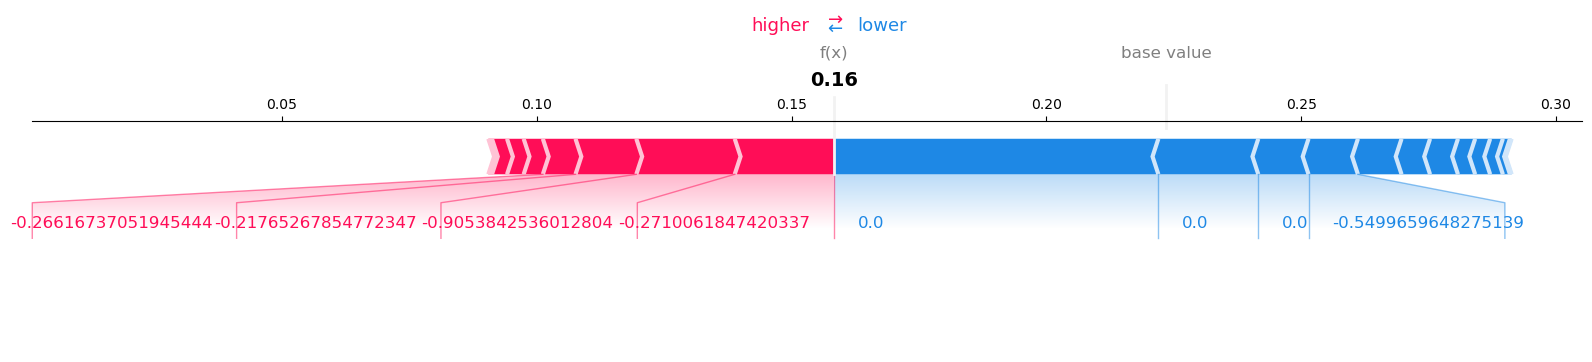

In [78]:
shap.force_plot(
    rf_explainer.expected_value[1],
    test_rf_shap_values[1][ex_0_index, :],
    X_test_transformed[ex_0_index, :],
    matplotlib=True,
)

The model score is smaller than the base value, which is reflected in the prediction of class 0.

In [79]:
pd.DataFrame(
    test_rf_shap_values[1][ex_1_index, :],
    index = column_names,
    columns = ['SHAP values'],
)

,SHAP values
LIMIT_BAL,-0.000989
AGE,0.015401
BILL_AMT1,-0.010761
BILL_AMT2,-0.005284
BILL_AMT3,-0.009267
BILL_AMT4,0.005993
BILL_AMT5,0.000950
BILL_AMT6,-0.014785
PAY_AMT1,0.017286
PAY_AMT2,-0.008198


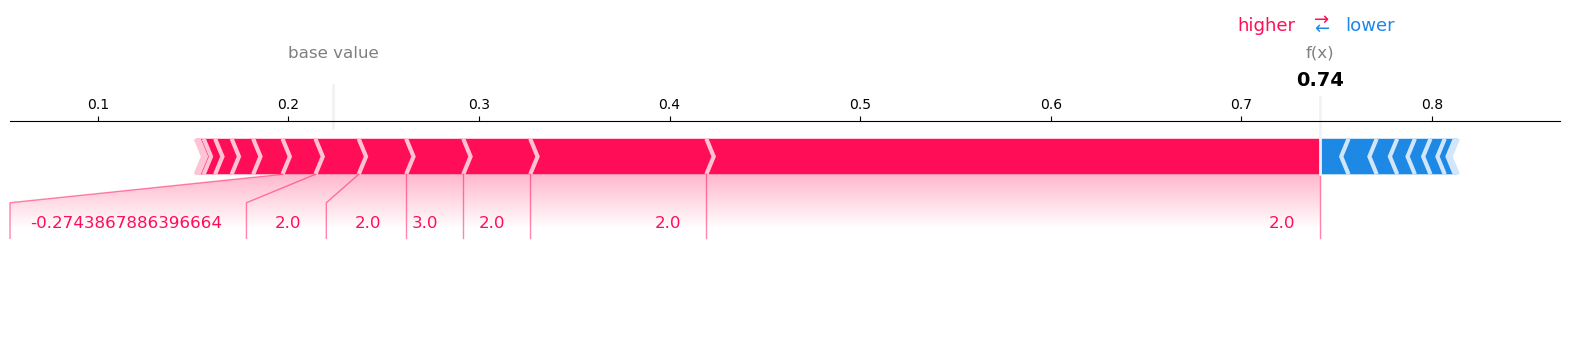

In [80]:
shap.force_plot(
    rf_explainer.expected_value[1],
    test_rf_shap_values[1][ex_1_index, :],
    X_test_transformed[ex_1_index, :],
    matplotlib=True,
)

The score is with respect to class 1, higher than the base value, base value is at 0.2, we can see most features pushing the prediction to higher value.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

Table of important results found in this project

In [81]:
results = {
    'Best Model': ['Random Forest'],
    'Optimized Hyperparameters': ['n_estimators = 21, max_depth = 13, max_features = 20'],
    'Validation Accuracy': [0.8164],
    'Validation Recall': [0.370],
    'Validation Precision': [0.6585],
    'Validation F1 Score': [0.4736],
    'Validation ROC-AUC': [0.7692],
    'Test Accuracy': [0.8163],
    'Test Precision': [0.6270],
    'Test Recall': [0.3737],
    'Test F1 Score': [0.4683],
    'Test ROC-AUC': [0.6561],
    'Most Important Feature': ['PAY_0'],
}
pd.DataFrame(results).T


,0
Best Model,Random Forest
Optimized Hyperparameters,"n_estimators = 21, max_depth = 13, max_feature..."
Validation Accuracy,0.8164
Validation Recall,0.37
Validation Precision,0.6585
Validation F1 Score,0.4736
Validation ROC-AUC,0.7692
Test Accuracy,0.8163
Test Precision,0.627
Test Recall,0.3737


In this project, we used different machine learning models to predict the default payment with personal information and payment history of the client. By training different ML models and compared different metrics including accuracy, precision, recall, f1 score, and roc-auc score to determine the best ML model for the specific dataset. We found that random forest model has the best overall metrics, and the random forest model shows the good generalization on unseen data. Then we adjusted its hyperparameters with random search. 
We used eli5 and SHAP values to explore the important features in the prediction and noticed that most recent payment status and age are the key factors affect the default payment.
Other idea that I did not try but could potentially the performance and interpretability are feature engineering, use class weight to address class imbalance, try other ML models and make comparison, and so on.

In [82]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)